## Imports

In [1]:
import sys
sys.path.append('../')
from parameters import D1_ND, Parameters
from twobox import TwoBox
import numpy as np
import matplotlib.pyplot as plt

## Build grating

In [2]:
grating_type = "Ilic"

if grating_type=="Ilic":
    ## Ilic
    wavelength      = 1.5 #/ D1_ND(1.2/100)
    grating_pitch   = 1.8 / wavelength
    grating_depth   = 0.5 / wavelength
    box1_width      = 0.15 * grating_pitch
    box2_width      = 0.35 * grating_pitch
    box_centre_dist = 0.60 * grating_pitch
    box1_eps        = 3.5**2 
    box2_eps        = 3.5**2
    gaussian_width  = 2.7180049942915896 * 10
    substrate_depth = 0.5 / wavelength
    substrate_eps   = 1.45**2
if grating_type=="Optimised":
    ## Optimised - second
    grating_pitch   = 1.5384469388251338
    grating_depth   = 0.5580762361523982
    box1_width      = 0.10227122552871484
    box2_width      = 0.07605954942866577
    box_centre_dist = 0.2669020979549422
    box1_eps        = 9.614975107945112
    box2_eps        = 9.382304398409568
    gaussian_width  = 33.916288616522735
    substrate_depth = 0.17299998450776535
    substrate_eps   = 9.423032644325023
if grating_type=="First":
    grating_pitch       = 1.2269811605680625
    grating_depth       = 1.0708522822331097
    box1_width          = 0.14980809568967832
    box2_width          = 0.3138280436942734
    box_centre_dist     = 0.3563592721858686
    box1_eps            = 10.519396098839394
    box2_eps            = 2.1346426711459654
    gaussian_width      = 27.58894024158397
    substrate_depth     = 0.5382848081542992
    substrate_eps       = 9.270741779881561

wavelength      = 1.
angle           = 0.
Nx              = 100
numG            = 25
Qabs            = np.inf

grating = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs)

## Structure

In [ ]:
_, _, p_fig, p_ax = grating.show_permittivity(show_analytic_box=True)

## Gather data over wavelength (velocity) range

In [29]:
I = 10e9 #0.5 * 10**9
final_speed = 15 #6.8   
num_points = 200
wavelength_range = np.linspace(1, 1/D1_ND(final_speed/100), num_points)
from numpy.linalg import norm as norm

####################
## Build arrays

## Q arrays
Q1 = np.zeros(num_points)
Q2 = np.zeros(num_points)

## Restoring arrays
kyy = np.zeros(num_points)
kyphi = np.zeros(num_points)
kphiy = np.zeros(num_points)
kphiphi = np.zeros(num_points)

## Damping arrays
muyy = np.zeros(num_points)
muyphi = np.zeros(num_points)
muphiy = np.zeros(num_points)
muphiphi = np.zeros(num_points)

## Eigenvalue arrays
real1 = np.zeros(num_points)
real2 = np.zeros(num_points)
real3 = np.zeros(num_points)
real4 = np.zeros(num_points)
imag1 = np.zeros(num_points)
imag2 = np.zeros(num_points)
imag3 = np.zeros(num_points)
imag4 = np.zeros(num_points)

REAL = 0j*np.zeros( (num_points, 4) )
VEC = 0j*np.zeros( (num_points, 4, 4) )

vec1_mod = np.zeros( (4,num_points) )
vec2_mod = np.zeros( (4,num_points) )
vec3_mod = np.zeros( (4,num_points) )
vec4_mod = np.zeros( (4,num_points) )

## Calculate data
for i in range(num_points):
    wavelength = wavelength_range[i]
    Qs_array, rest_array, damp_array, real_array, imag_array, vec_array = grating.Linear_info_new(wavelength, I)
    ## Save to arrays
    Q1[i] = Qs_array[0];        Q2[i] = Qs_array[1]
    kyy[i] = rest_array[0];     kyphi[i] = rest_array[1];       kphiy[i] = rest_array[2];       kphiphi[i] = rest_array[3]
    muyy[i] = damp_array[0];    muyphi[i] = damp_array[1];      muphiy[i] = damp_array[2];      muphiphi[i] = damp_array[3]
    real1[i] = real_array[0];   real2[i] = real_array[1];       real3[i] = real_array[2];       real4[i] = real_array[3]
    imag1[i] = imag_array[0];   imag2[i] = imag_array[1];       imag3[i] = imag_array[2];       imag4[i] = imag_array[3]

    REAL[i] = real_array + 1j * imag_array
    VEC[i] = vec_array

    ## Extract (normalised) components of eigenvectors
    vec1, vec2, vec3, vec4 = vec_array
    vec1_mod[:,i] = np.abs(vec1)/norm(vec1)
    vec2_mod[:,i] = np.abs(vec2)/norm(vec2)
    vec3_mod[:,i] = np.abs(vec3)/norm(vec3)
    vec4_mod[:,i] = np.abs(vec4)/norm(vec4)

wavelength_minmax = [1, 1/D1_ND(final_speed/100)]

## Convert wavelength to velocity
v = np.zeros(num_points)
for i in range(num_points):
    D = 1/wavelength_range[i]
    v[i] = (1-D**2)/(1+D**2)
v = v*100
vlim = [0,final_speed]


In [30]:
sorted_eigenvalues_array = np.zeros_like(REAL, dtype=np.complex128)
sorted_eigenvectors_array = np.zeros_like(VEC, dtype=np.complex128)
for i in range(num_points):
    sort_indices = np.argsort(np.imag(REAL[i]))  # Get sorting order based on imag part

    sorted_eigenvalues_array[i] = REAL[i][sort_indices]  # Sort eigenvalues

    sorted_eigenvectors_array[i] = VEC[i][:, sort_indices]  # Sort corresponding eigenvectors



In [43]:
real1_sort = np.real(sorted_eigenvalues_array[:,0])
real2_sort = np.real(sorted_eigenvalues_array[:,1])
real3_sort = np.real(sorted_eigenvalues_array[:,2])
real4_sort = np.real(sorted_eigenvalues_array[:,3])

imag1_sort = np.imag(sorted_eigenvalues_array[:,0])
imag2_sort = np.imag(sorted_eigenvalues_array[:,1])
imag3_sort = np.imag(sorted_eigenvalues_array[:,2])
imag4_sort = np.imag(sorted_eigenvalues_array[:,3])


In [ ]:
sorted_eigenvalues_array[:,1]

array([ 0.0031513 -378.20883844j, -0.00044669 -81.55118946j,
       -0.00044669 +81.55118946j,  0.0031513 +378.20883844j])

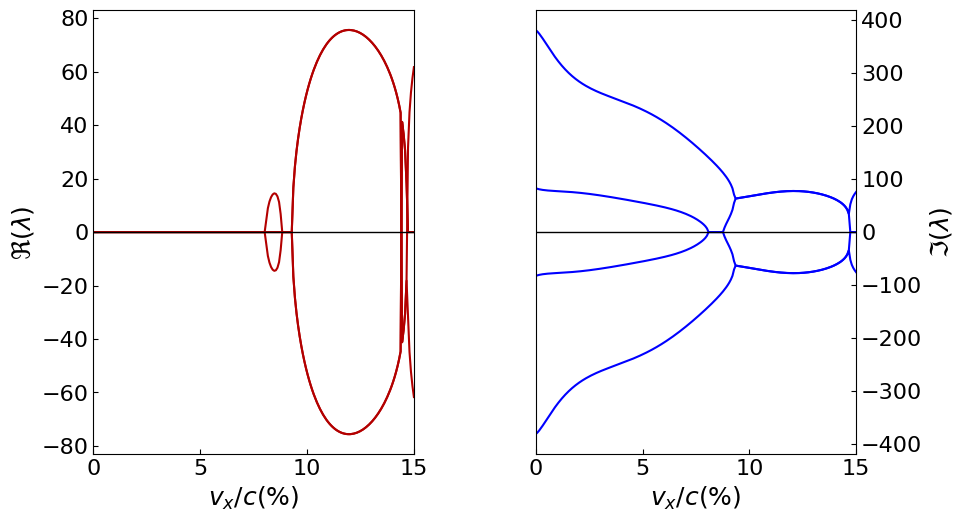

In [45]:
### PLOTTING ### 


# Set up figure
fig, (ax1, dummy, ax2) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1))
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
dummy.axis('off')
# p = grating.grating_pitch
# ax1.set_xlim(np.array(wavelength_minmax)/p)
# ax2.set_xlim(np.array(wavelength_minmax)/p) 
ax1.set_xlim(vlim)
# ax1.set_xticks([0,1,2,2.7])
ax2.set_xlim(vlim) 
# ax2.set_xticks([0,1,2,2.7])
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

## Plot eigs vs wavelength ##
colorReal=(0.7, 0, 0)
ax1.plot(v,real1_sort, '-', markersize=0.5, markerfacecolor=colorReal, fillstyle='full',  color=colorReal)
ax1.plot(v,real2_sort, '-', markersize=0.5, markerfacecolor=colorReal, fillstyle='full',  color=colorReal)
ax1.plot(v,real3_sort, '-', markersize=0.5, markerfacecolor=colorReal, fillstyle='full',  color=colorReal)
ax1.plot(v,real4_sort, '-', markersize=0.5, markerfacecolor=colorReal, fillstyle='full',  color=colorReal)
ylabel=rf"$\Re(\lambda)$"

colorImag= 'blue'
ax2.plot(v,imag1_sort, '-', markersize=0.5, markerfacecolor=colorImag, fillstyle='full',  color=colorImag)
ax2.plot(v,imag2_sort, '-', markersize=0.5, markerfacecolor=colorImag, fillstyle='full',  color=colorImag)
ax2.plot(v,imag3_sort, '-', markersize=0.5, markerfacecolor=colorImag, fillstyle='full',  color=colorImag)
ax2.plot(v,imag4_sort, '-', markersize=0.5, markerfacecolor=colorImag, fillstyle='full',  color=colorImag)
ylabel2=rf"$\Im(\lambda)$"

# ## Logarithmic
# if log_1:
#     linthr = 0.1
#     ax1.set_yscale("symlog", linthresh=linthr, linscale=0.4)
#     ax1.yaxis.set_minor_locator(MinorSymLogLocator(linthr))
# if log_2:
#     linthr = 0.1
#     ax2.set_yscale("symlog", linthresh=linthr, linscale=0.4)
#     ax2.yaxis.set_minor_locator(MinorSymLogLocator(linthr))


# Axis labels
ax1.axhline(y=0, color='black', linestyle='-', lw = '1')
ax1.tick_params(axis='both', which='both', direction='in') # ticks inside box
# ax1.tick_params(axis='y', color=colorReal, labelcolor=colorReal) # colored ticks
ax1.set_ylabel(ylabel=ylabel)  #color=colorReal  # colored y label
# ax1.set(xlabel=r"$\lambda'/\Lambda'$")
ax1.set(xlabel=r"$v_x/c (\%)$")

ax2.axhline(y=0, color='black', linestyle='-', lw = '1')
ax2.tick_params(axis='both', which='both', direction='in') # ticks inside box
# ax2.tick_params(axis='y', color = colorImag, labelcolor=colorImag) # colored ticks
ax2.set_ylabel(ylabel=ylabel2) #color=colorImag  # colored y label
# ax2.set(xlabel=r"$\lambda'/\Lambda'$")
ax2.set(xlabel=r"$v_x/c (\%)$")

# fig.suptitle(t=rf"$h_1' = {self.grating_depth/self.wavelength:.3f}\lambda_0$, $\Lambda' = {self.grating_pitch/self.wavelength:.3f}\lambda_0$")

# Modify axes
cm_to_inch = 0.393701
fig_width = 30*cm_to_inch
fig_height = 17.6*cm_to_inch
fig.set_size_inches(fig_width/1.2, fig_height/1.2)

In [33]:
from numpy.linalg import norm as norm
a = np.array( [1j,2-1j,3-0.4j, 15-7j] )
print(np.abs(a)/norm(a))
print( [norm(a[0]), norm(a[1]), norm(a[2]),norm(a[3])]/norm(a) )
print(np)

# T= np.array( [[1,2,3],[4,5,6]] )
# print(np.zeros((2,3)))
# T[:,1]

[0.05880725 0.13149701 0.17798304 0.97343324]
[0.05880725 0.13149701 0.17798304 0.97343324]


## Plot eigenvalues

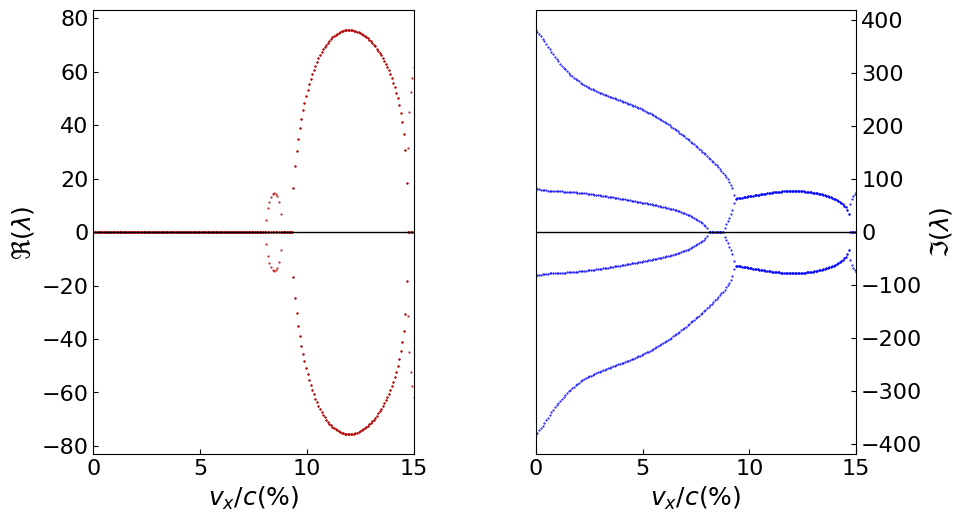

In [4]:
### PLOTTING ### 

# Set up figure
fig, (ax1, dummy, ax2) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1))
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
dummy.axis('off')
# p = grating.grating_pitch
# ax1.set_xlim(np.array(wavelength_minmax)/p)
# ax2.set_xlim(np.array(wavelength_minmax)/p) 
ax1.set_xlim(vlim)
# ax1.set_xticks([0,1,2,2.7])
ax2.set_xlim(vlim) 
# ax2.set_xticks([0,1,2,2.7])
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

## Plot eigs vs wavelength ##
colorReal=(0.7, 0, 0)
ax1.plot(v,real1, 'o', markersize=0.5, markerfacecolor=colorReal, fillstyle='full',  color=colorReal)
ax1.plot(v,real2, 'o', markersize=0.5, markerfacecolor=colorReal, fillstyle='full',  color=colorReal)
ax1.plot(v,real3, 'o', markersize=0.5, markerfacecolor=colorReal, fillstyle='full',  color=colorReal)
ax1.plot(v,real4, 'o', markersize=0.5, markerfacecolor=colorReal, fillstyle='full',  color=colorReal)
ylabel=rf"$\Re(\lambda)$"

colorImag= 'blue'
ax2.plot(v,imag1, 'o', markersize=0.5, markerfacecolor=colorImag, fillstyle='full',  color=colorImag)
ax2.plot(v,imag2, 'o', markersize=0.5, markerfacecolor=colorImag, fillstyle='full',  color=colorImag)
ax2.plot(v,imag3, 'o', markersize=0.5, markerfacecolor=colorImag, fillstyle='full',  color=colorImag)
ax2.plot(v,imag4, 'o', markersize=0.5, markerfacecolor=colorImag, fillstyle='full',  color=colorImag)
ylabel2=rf"$\Im(\lambda)$"

# ## Logarithmic
# if log_1:
#     linthr = 0.1
#     ax1.set_yscale("symlog", linthresh=linthr, linscale=0.4)
#     ax1.yaxis.set_minor_locator(MinorSymLogLocator(linthr))
# if log_2:
#     linthr = 0.1
#     ax2.set_yscale("symlog", linthresh=linthr, linscale=0.4)
#     ax2.yaxis.set_minor_locator(MinorSymLogLocator(linthr))


# Axis labels
ax1.axhline(y=0, color='black', linestyle='-', lw = '1')
ax1.tick_params(axis='both', which='both', direction='in') # ticks inside box
# ax1.tick_params(axis='y', color=colorReal, labelcolor=colorReal) # colored ticks
ax1.set_ylabel(ylabel=ylabel)  #color=colorReal  # colored y label
# ax1.set(xlabel=r"$\lambda'/\Lambda'$")
ax1.set(xlabel=r"$v_x/c (\%)$")

ax2.axhline(y=0, color='black', linestyle='-', lw = '1')
ax2.tick_params(axis='both', which='both', direction='in') # ticks inside box
# ax2.tick_params(axis='y', color = colorImag, labelcolor=colorImag) # colored ticks
ax2.set_ylabel(ylabel=ylabel2) #color=colorImag  # colored y label
# ax2.set(xlabel=r"$\lambda'/\Lambda'$")
ax2.set(xlabel=r"$v_x/c (\%)$")

# fig.suptitle(t=rf"$h_1' = {self.grating_depth/self.wavelength:.3f}\lambda_0$, $\Lambda' = {self.grating_pitch/self.wavelength:.3f}\lambda_0$")

# Modify axes
cm_to_inch = 0.393701
fig_width = 30*cm_to_inch
fig_height = 17.6*cm_to_inch
fig.set_size_inches(fig_width/1.2, fig_height/1.2)

In [200]:
_, L, m, c = Parameters()
grating.wavelength = 1/D1_ND(6.7/100)
grating.Eigs(I,m,c,"grad")

(array([ 0.00100675,  0.00100675, -0.00010144, -0.00010144]),
 array([ 149.89828196, -149.89828196,   13.26311448,  -13.26311448]))

## Eigenvector evolution

In [16]:
### PLOTTING ### 
from matplotlib.ticker import Locator
class MinorSymLogLocator(Locator):
    """
    Dynamically find minor tick positions based on the positions of
    major ticks for a symlog scaling.
    """
    def __init__(self, linthresh):
        """
        Ticks will be placed between the major ticks.
        The placement is linear for x between -linthresh and linthresh,
        otherwise its logarithmically
        """
        self.linthresh = linthresh

    def __call__(self):
        'Return the locations of the ticks'
        majorlocs = self.axis.get_majorticklocs()

        # iterate through minor locs
        minorlocs = []

        # handle the lowest part
        for i in range(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                ndivs = 10
            else:
                ndivs = 9
            minorstep = majorstep / ndivs
            locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
            minorlocs.extend(locs)

        return self.raise_if_exceeds(np.array(minorlocs))

    def tick_values(self, vmin, vmax):
        raise NotImplementedError('Cannot get tick locations for a '
                                  '%s type.' % type(self))
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath, physics}')

In [ ]:
log_1 = False
marker = 'o'

## Colours
colorY="blue"
colorvY="red"  #cornflowerblue

colorphi="black"  #"royalblue"
colorvphi="lightgreen"  #coral

# Set up figure
fig, ax1 = plt.subplots(nrows=1, ncols=1,)
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
dummy.axis('off')
# p = grating.grating_pitch
# ax1.set_xlim(np.array(wavelength_minmax)/p)
# ax2.set_xlim(np.array(wavelength_minmax)/p) 

from matplotlib.legend_handler import HandlerLine2D

## Plots
line1, = ax1.plot(v,vec1_mod[0], marker, markersize=0.5, label=r"$y$", color=colorY)
line2, = ax1.plot(v,vec1_mod[1], marker, markersize=0.5, label=r"$\phi$", color=colorphi)
line3, = ax1.plot(v,vec1_mod[2], marker, markersize=0.5, label=r"$v_y$", color=colorvY)
line4, = ax1.plot(v,vec1_mod[3], marker, markersize=0.5, label=r"$\dot{\phi}$", color=colorvphi)

ax1.plot(v,vec2_mod[0], marker, markersize=0.5, color=colorY)
ax1.plot(v,vec2_mod[1], marker, markersize=0.5, color=colorphi)
ax1.plot(v,vec2_mod[2], marker, markersize=0.5, color=colorvY)
ax1.plot(v,vec2_mod[3], marker, markersize=0.5, color=colorvphi)

ax1.plot(v,vec3_mod[0], marker, markersize=0.5, color=colorY)
ax1.plot(v,vec3_mod[1], marker, markersize=0.5, color=colorphi)
ax1.plot(v,vec3_mod[2], marker, markersize=0.5, color=colorvY)
ax1.plot(v,vec3_mod[3], marker, markersize=0.5, color=colorvphi)

ax1.plot(v,vec4_mod[0], marker, markersize=0.5, color=colorY)
ax1.plot(v,vec4_mod[1], marker, markersize=0.5, color=colorphi)
ax1.plot(v,vec4_mod[2], marker, markersize=0.5, color=colorvY)
ax1.plot(v,vec4_mod[3], marker, markersize=0.5, color=colorvphi)

ax1.set(xlim=vlim,ylim=(-0.1,1.1))
# ax1.set_xticks([0,1,2,2.7])
legend = ax1.legend(handler_map={
    line1: HandlerLine2D(numpoints=1),
    line2: HandlerLine2D(numpoints=1),
    line3: HandlerLine2D(numpoints=1) })
for legend_handle in legend.legend_handles:
    legend_handle.set_linestyle('-')

## Labels
ax1.set(xlabel=r"$v_x/c\, (\%)$", ylabel=r"$\norm{\vb{v}_{\lambda}}_i $ normalised")

## Logarithmic
if log_1:
    linthr = 0.1
    ax1.set_yscale("symlog", linthresh=linthr, linscale=0.4)
    ax1.yaxis.set_minor_locator(MinorSymLogLocator(linthr))

# Modify axes
cm_to_inch = 0.393701
fig_width = 30*cm_to_inch
fig_height = 17.6*cm_to_inch
fig.set_size_inches(fig_width/1.2, fig_height/1.2)

In [4]:
_, L,m ,c = Parameters()
I = 10e9
grating.wavelength = 1/ D1_ND(0/100)
real_here, imag_here, vec_here = grating.Eigs(I,m,c,"grad",False,True)
print(real_here[0]*1e3)
print(real_here[3]*1e3)
print(np.abs(vec_here[:,0]))
print(np.abs(vec_here[:,3]))

-0.028290180440029063
-0.4007031065267272
[3.01202077e-03 8.75829231e-04 9.60224340e-01 2.79212067e-01]
[1.28649059e-02 1.73207696e-04 9.99826614e-01 1.34612461e-02]


## Eigenvectors at v=0

In [5]:
_, L, m, c = Parameters()
I = 10e9
grating.wavelength = 1 / D1_ND(0/100)
real_v0, imag_v0, vec_v0 = grating.Eigs(I,m,c,"grad",False,True)
vec1 = vec_v0[:,0]
vec2 = vec_v0[:,1]
vec3 = vec_v0[:,2]
vec4 = vec_v0[:,3]

sum1 = np.real( vec1+vec2 )
sum = np.real( vec3+vec4 )
print(real_v0*1e3)
print(sum1[0], sum[0])
print(sum1[1], sum[1])
print(sum1[2], sum[2])
print(sum1[3], sum[3])
print()
print(sum[0])
print(sum[1])
print(sum[2])
print(sum[3])

[-0.02829018 -0.02829018 -0.40070311 -0.40070311]
5.345753475058606e-10 -1.3266038044024307e-07
3.061587515290477e-09 -8.337125305810491e-09
-1.9204486790123356 1.999653228985437
-0.558424134413175 0.02692249228938459

-1.3266038044024307e-07
-8.337125305810491e-09
1.999653228985437
0.02692249228938459


## Plot restoring terms

In [7]:
## Colors

colorX="black"   
colorvX="xkcd:pine green"

colorY="blue"
colorvY="dodgerblue"  #cornflowerblue

colorphi="red"  #"royalblue"
colorvphi="tomato"  #coral

colorRotate="darkgreen"
colorRotateRate="seagreen"

LabelSize=15

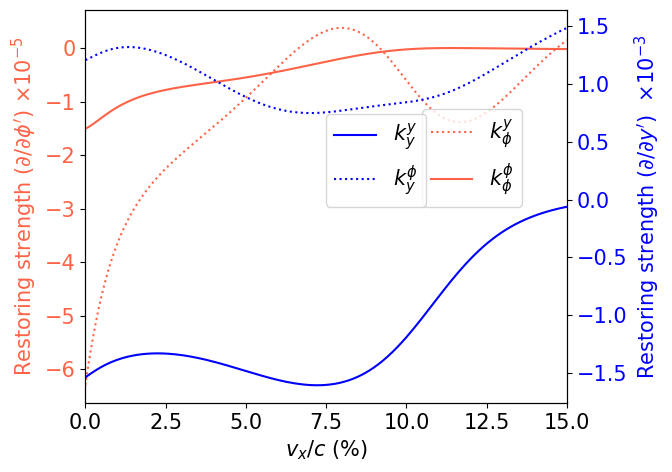

In [8]:
################
# Restoring terms

fig,ax=plt.subplots(1,1,figsize=(7,5))

ax.plot(v,kyphi*1e-5,  label="$k^y_\phi$",color=colorvphi,linestyle="dotted")
ax.plot(v,kphiphi*1e-5,label="$k^\phi_\phi$",color=colorvphi)

ax.set_xlabel("$v_x/c$ ($\%$)",fontsize=LabelSize)
ax.set_ylabel("Restoring strength ($\partial/\partial \phi'$) $\\times 10^{-5}$",fontsize=LabelSize,color=colorvphi)
ax.tick_params(labelsize=15)
ax.tick_params(axis='y',labelcolor=colorvphi)


# ax.hlines(0,0,5,"k","dashed",alpha=0.2)
t=ax.get_ylim()
# ax.axhspan(0,t[1],color='black',alpha=0.2)

ax1=ax.twinx()

ax1.plot(v,kphiy*1e-3,  label="$k^\phi_y$",color=colorY,linestyle="dotted")
ax1.plot(v,kyy*1e-3,    label="$k^y_y$",color=colorY)

ax1.set_ylabel("Restoring strength ($\partial/\partial y'$)  $\\times 10^{-3}$",fontsize=LabelSize,color=colorY)
ax1.tick_params(labelsize=15)
ax1.tick_params(axis='y',labelcolor=colorY)


ax.set_ylim(t)
ax.set_xlim(vlim)

# ax.set_xticks([0,1,1.45,2,3,4,5])

handles, labels = ax.get_legend_handles_labels()
handles1, labels1 = ax1.get_legend_handles_labels()
order = [0,1]
order1=[1,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=(0.5+0.2,0.5),fontsize=LabelSize)
ax1.legend([handles1[idx] for idx in order1],[labels1[idx] for idx in order1],loc=(0.5,0.5),fontsize=LabelSize)

fig.tight_layout()
# plt.savefig("Saved/Restoring300.jpeg",format="jpeg",dpi=300,bbox_inches='tight')
# plt.close()



## Damping terms

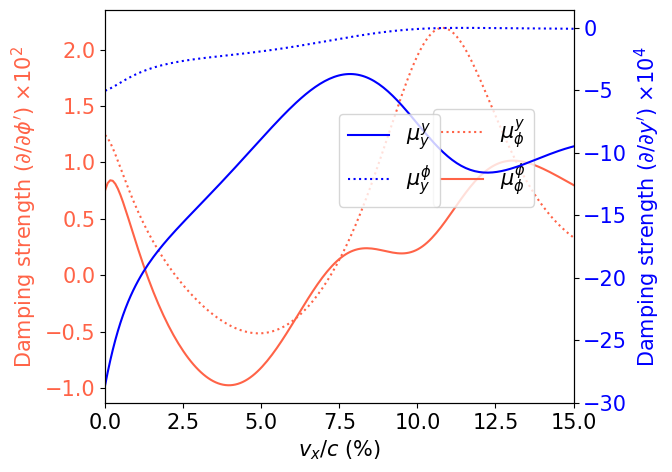

In [9]:
##############
# Damping terms

fig,ax=plt.subplots(1,1,figsize=(7,5))


ax.plot(v,muyphi*1e2,  label="$\mu^y_\phi$",color=colorvphi,linestyle="dotted")
ax.plot(v,muphiphi*1e2,label="$\mu^\phi_\phi$",color=colorvphi)

ax.set_xlabel("$v_x/c$ ($\%$)",fontsize=LabelSize)
ax.set_ylabel("Damping strength ($\partial/\partial \phi'$) $\\times 10^{2}$",fontsize=LabelSize,color=colorvphi)
ax.tick_params(labelsize=15)
ax.tick_params(axis='y',labelcolor=colorvphi)

t=ax.get_ylim()
ax1=ax.twinx()

ax1.plot(v,muphiy*1e4,  label="$\mu^\phi_y$",color=colorY,linestyle="dotted")
ax1.plot(v,muyy*1e4,    label="$\mu^y_y$",color=colorY)

ax1.set_ylabel("Damping strength ($\partial/\partial y'$) $\\times 10^{4}$",fontsize=LabelSize,color=colorY)
ax1.tick_params(labelsize=15)
ax1.tick_params(axis='y',labelcolor=colorY)

# # Does not correspond to 1.28%
# ax.vlines(1.4507253626813408,t[0],0,color='k',linestyle='dashed',alpha=0.2)
# ax.hlines(0,0,1.4507253626813408,color='k',linestyle='dashed',alpha=0.2)

ax.set_ylim(t)
ax.set_xlim(vlim)

# ax.set_xticks([0,1,1.45,2,3,4,5])

handles, labels = ax.get_legend_handles_labels()
handles1, labels1 = ax1.get_legend_handles_labels()
order = [0,1]
order1=[1,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=(0.5+0.2,0.5),fontsize=LabelSize)
ax1.legend([handles1[idx] for idx in order1],[labels1[idx] for idx in order1],loc=(0.5,0.5),fontsize=LabelSize)

fig.tight_layout()
# plt.savefig("Saved/Damping300.jpeg",format="jpeg",dpi=300,bbox_inches='tight')
# plt.close()


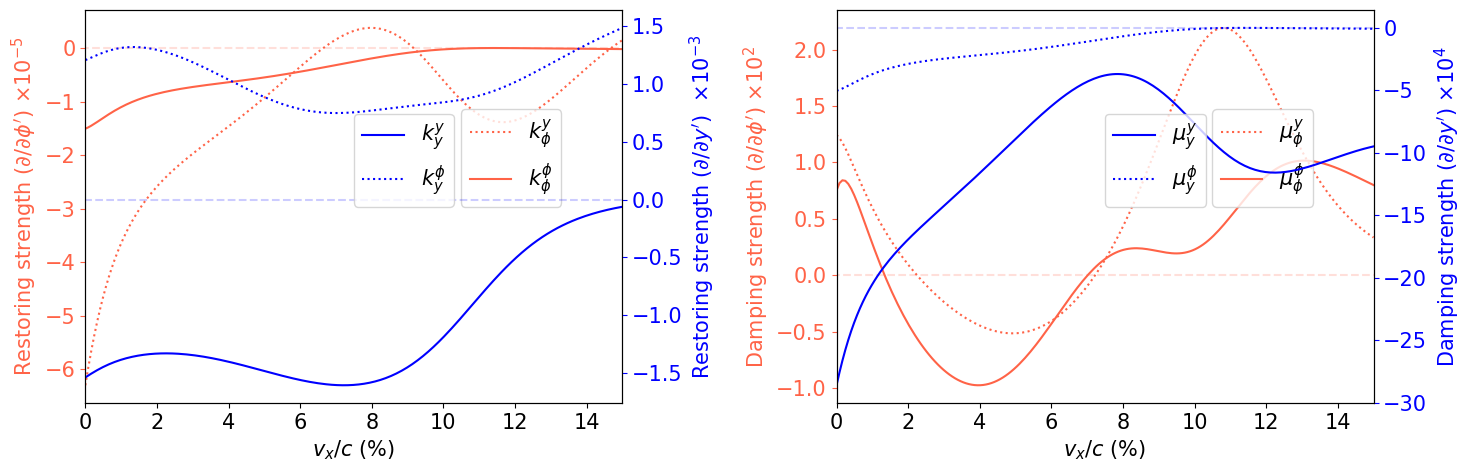

In [23]:
## Combined

################
## Restoring terms

# phi derivatives
fig,(ax, ax2) =plt.subplots(1,2,figsize=(15,5))

ax.plot(v,kyphi*1e-5,  label="$k^y_\phi$",color=colorvphi,linestyle="dotted")
ax.plot(v,kphiphi*1e-5,label="$k^\phi_\phi$",color=colorvphi)

ax.set_xlabel("$v_x/c$ ($\%$)",fontsize=LabelSize)
ax.set_ylabel("Restoring strength ($\partial/\partial \phi'$) $\\times 10^{-5}$",fontsize=LabelSize,color=colorvphi)
ax.tick_params(labelsize=15)
ax.tick_params(axis='y',labelcolor=colorvphi, color=colorvphi)


t=ax.get_ylim()
X = ax.get_xlim()
ax.hlines(0,X[0],X[1],"k","dashed", color=colorvphi, alpha=0.2)
# ax.axhspan(0,t[0],t[1],'--',color=colorvphi,alpha=0.2)

# y derivatives
ax1=ax.twinx()
ax1.plot(v,kphiy*1e-3,  label="$k^\phi_y$",color=colorY,linestyle="dotted")
ax1.plot(v,kyy*1e-3,    label="$k^y_y$",color=colorY)

ax1.set_ylabel("Restoring strength ($\partial/\partial y'$)  $\\times 10^{-3}$",fontsize=LabelSize,color=colorY)
ax1.tick_params(labelsize=15)
ax1.tick_params(axis='y',labelcolor=colorY, color = colorY)

X = ax.get_xlim()
ax1.hlines(0,X[0],X[1],"k","dashed", color=colorY, alpha=0.2)
ax.set_ylim(t)
ax.set_xlim(vlim)

# ax.set_xticks([0,1,1.45,2,3,4,5])

handles, labels = ax.get_legend_handles_labels()
handles1, labels1 = ax1.get_legend_handles_labels()
order = [0,1]
order1=[1,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=(0.5+0.2,0.5),fontsize=LabelSize)
ax1.legend([handles1[idx] for idx in order1],[labels1[idx] for idx in order1],loc=(0.5,0.5),fontsize=LabelSize)

################
## Damping terms

# vy derivatives
ax2.plot(v,muyphi*1e2,  label="$\mu^y_\phi$",color=colorvphi,linestyle="dotted")
ax2.plot(v,muphiphi*1e2,label="$\mu^\phi_\phi$",color=colorvphi)
ax2.set_xlabel("$v_x/c$ ($\%$)",fontsize=LabelSize)
ax2.set_ylabel("Damping strength ($\partial/\partial \phi'$) $\\times 10^{2}$",fontsize=LabelSize,color=colorvphi)
ax2.tick_params(labelsize=15)
ax2.tick_params(axis='y',labelcolor=colorvphi, color=colorvphi)

t2=ax2.get_ylim()
X = ax2.get_xlim()
ax2.hlines(0,X[0],X[1],"k","dashed", color=colorvphi, alpha=0.2)

# vphi derivatvies
ax2b=ax2.twinx()
ax2b.plot(v,muphiy*1e4,  label="$\mu^\phi_y$",color=colorY,linestyle="dotted")
ax2b.plot(v,muyy*1e4,    label="$\mu^y_y$",color=colorY)

ax2b.set_ylabel("Damping strength ($\partial/\partial y'$) $\\times 10^{4}$",fontsize=LabelSize,color=colorY)
ax2b.tick_params(labelsize=15)
ax2b.tick_params(axis='y',labelcolor=colorY, color=colorY)

X = ax2b.get_xlim()
ax2b.hlines(0,X[0],X[1],"k","dashed", color=colorY, alpha=0.2)
ax2.set_ylim(t2)
ax2.set_xlim(vlim)

handles, labels = ax2.get_legend_handles_labels()
handles1, labels1 = ax2b.get_legend_handles_labels()
order = [0,1]
order1=[1,0]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=(0.5+0.2,0.5),fontsize=LabelSize)
ax2b.legend([handles1[idx] for idx in order1],[labels1[idx] for idx in order1],loc=(0.5,0.5),fontsize=LabelSize)

fig.tight_layout()

# plt.savefig("Saved/Restoring300.jpeg",format="jpeg",dpi=300,bbox_inches='tight')
# plt.close()

In [170]:
t

(np.float64(-1.0497185105080342), np.float64(1.3157181829461773))

## Diffraction efficiencies at delta'=0 over wavelength

Text(0.5, 0.98, "Efficiency factors at $\\delta'=0$")

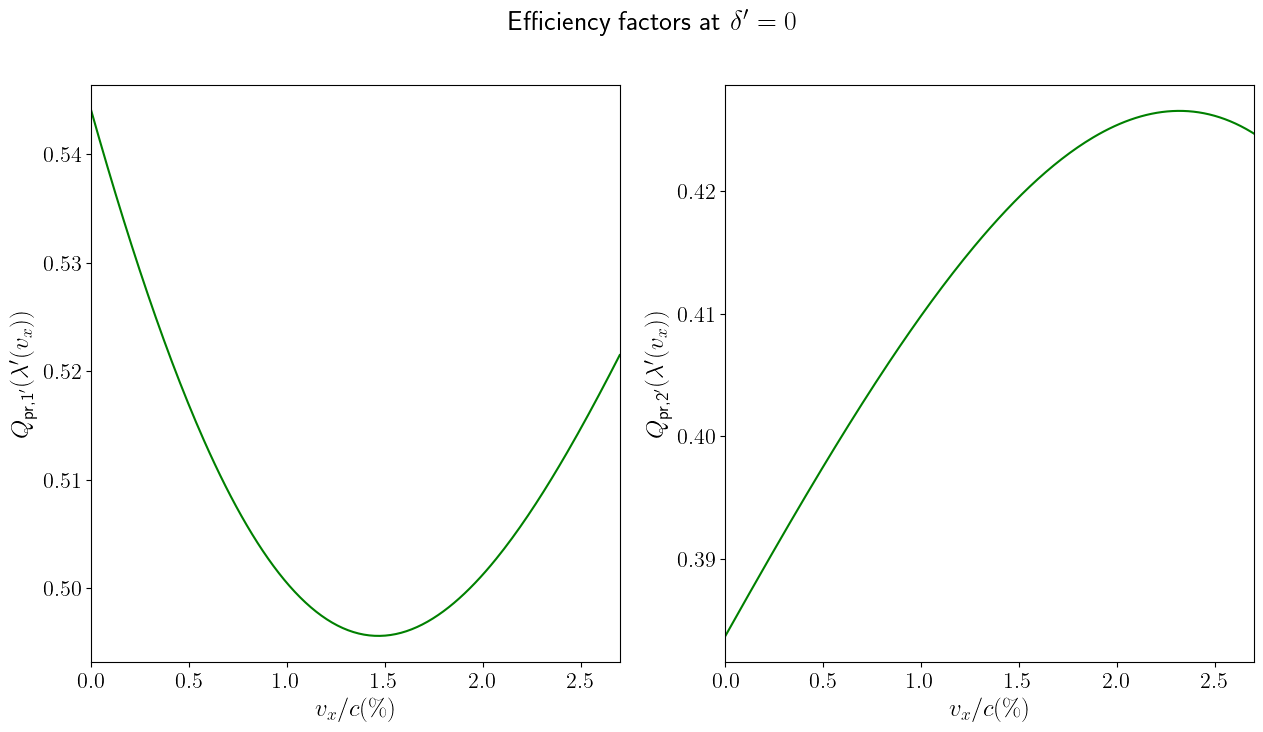

In [140]:
##############################
#### Plotting
cutoff = np.arcsin( 1 - wavelength / grating_pitch) * (180/np.pi)
cutoff2_test = 1 - 2* wavelength / grating_pitch
order_2 = False
if np.abs(cutoff2_test)<1:
    order_2 = True
    cutoff2 = np.arcsin(cutoff2_test) * (180/np.pi)

## Efficiency factors
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(v, Q1,       color="green",    label="GRCWA")
ax2.plot(v, Q2,       color="green",    label="GRCWA")
ax1.set_xlim(vlim)
ax2.set_xlim(vlim)


ax1.set_xlabel("$v_x/c (\%)$")
ax1.set_ylabel("$Q_{\\text{pr,1}'} (\lambda'(v_x))$")
ax2.set_xlabel("$v_x/c (\%)$")
ax2.set_ylabel("$Q_{\\text{pr,2}'} (\lambda'(v_x))$")

fig.suptitle(rf"Efficiency factors at $\delta'=0$")

## Diffraction efficiencies over angle

In [217]:
wavelength = 1/D1_ND(0/100)
cutoff = np.arcsin( 1 - wavelength / grating_pitch) * (180/np.pi)
cutoff2_test = 1 - 2* wavelength / grating_pitch
order_2 = False
if np.abs(cutoff2_test)<1:
    order_2 = True
    cutoff2 = np.arcsin(cutoff2_test) * (180/np.pi)
print(np.tan( (np.pi/180)*cutoff)*100, cutoff2)
print(cutoff)

16.90308509457033 -41.8103148957786
9.59406822686046


Text(0.5, 0.98, "Efficiency factors at $\\lambda'=$ 1.11")

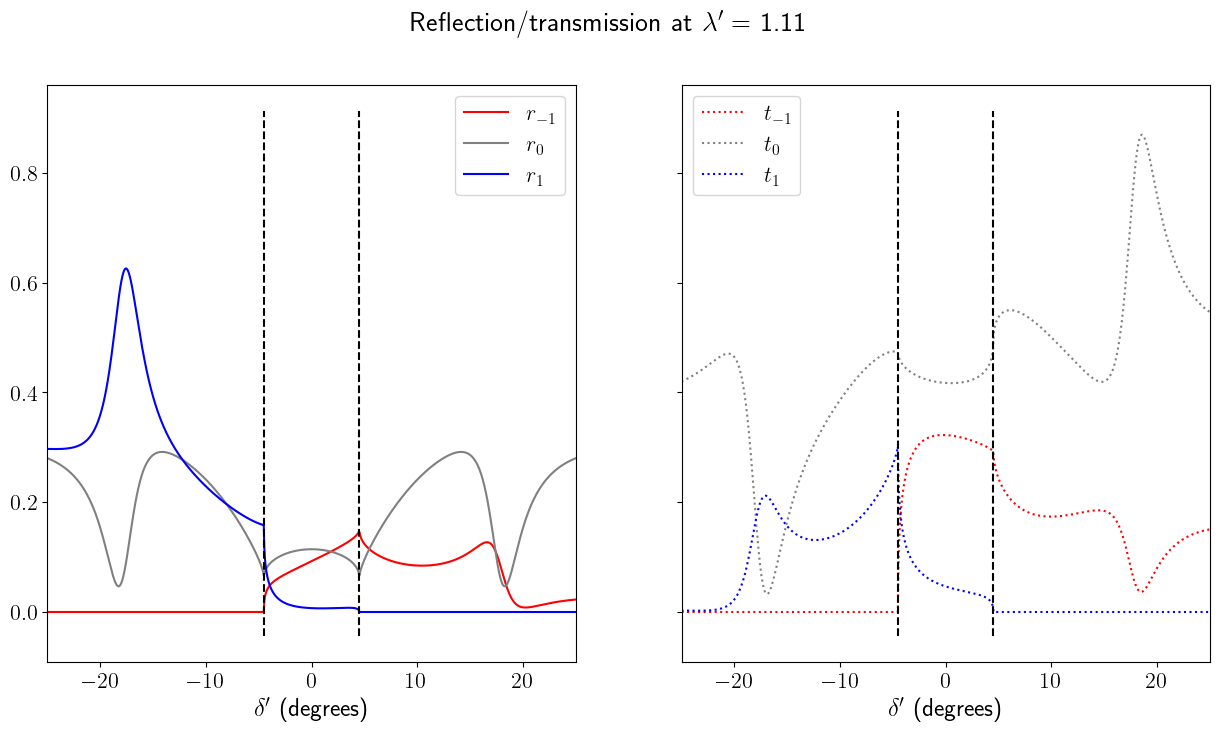

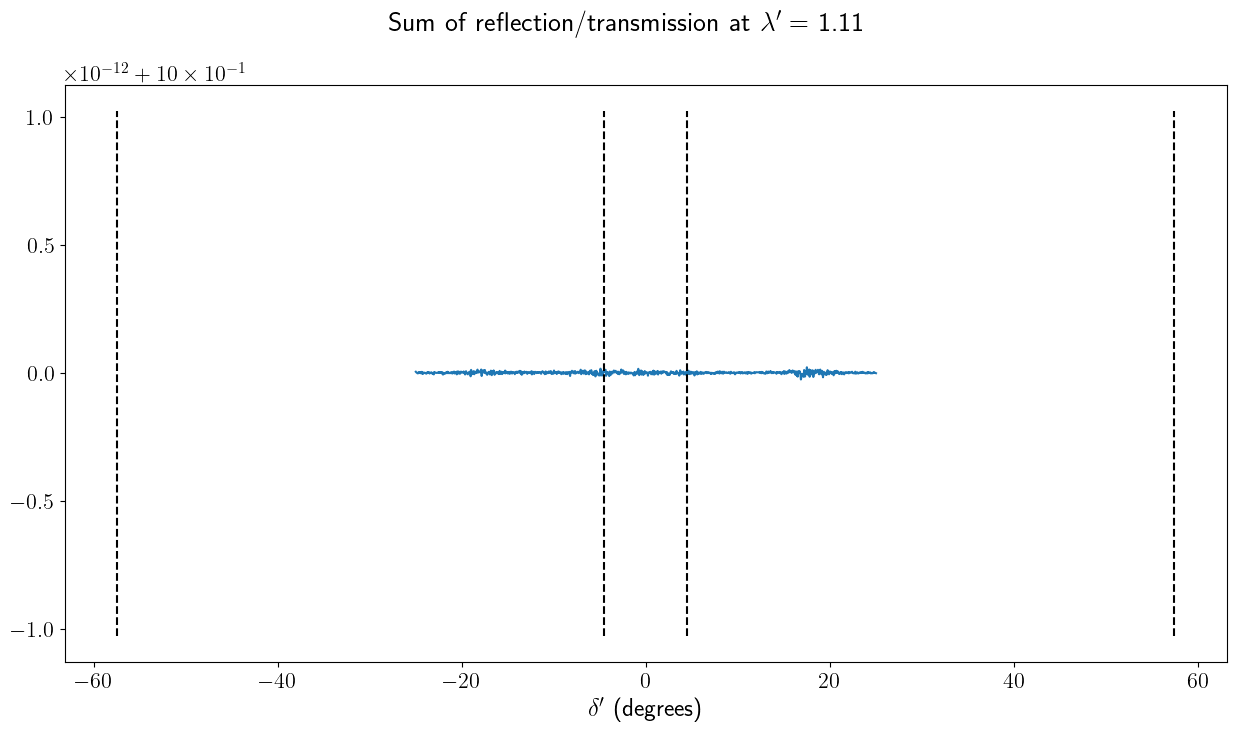

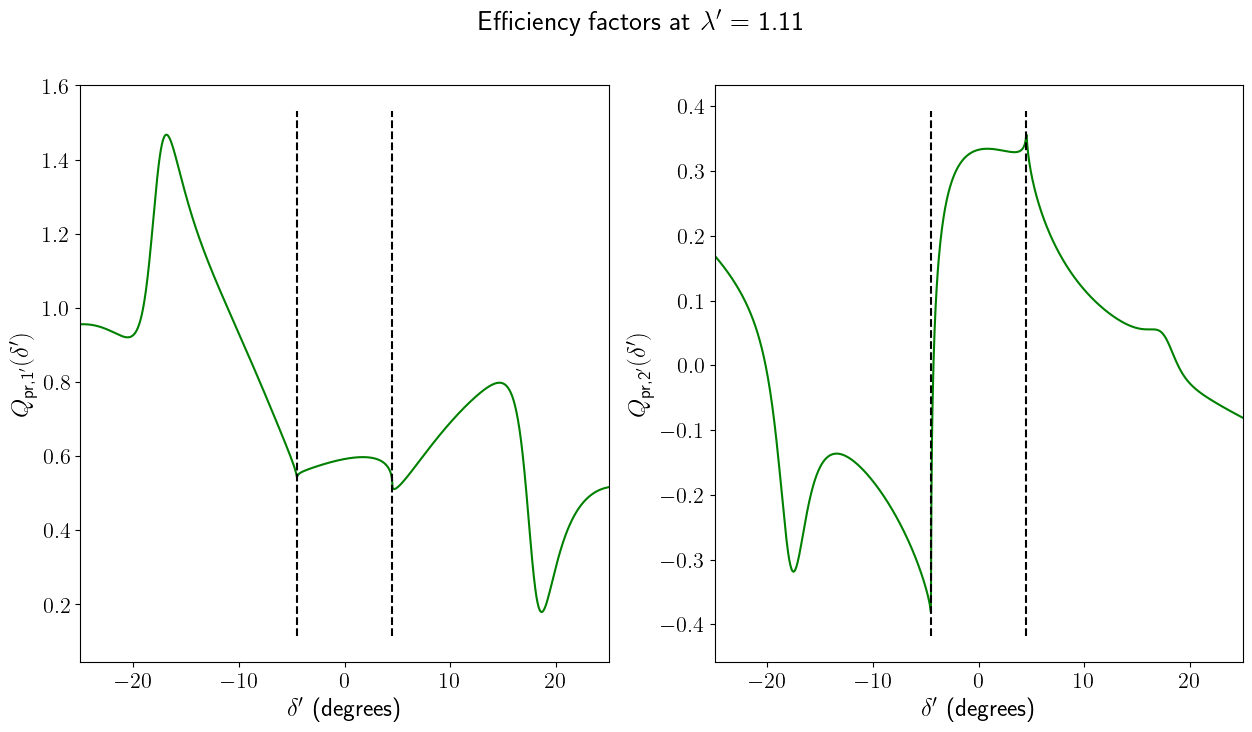

In [211]:
def Q(angle, r, t):
    def beta_m(m):
        test=(np.sin(angle)+m*wavelength/grating_pitch)
        if abs(test)>=1:
            delta_m="no_diffraction_order"
        else:
            delta_m=np.arcsin(test)
        return delta_m
    Q1=0
    Q2=0
    M=[-1,0,1]
    for m in range(len(M)):
        delta_m=beta_m(M[m])
        if isinstance(delta_m,str):
            Q1=Q1+0
            Q2=Q2+0
        else:
            Q1=Q1+ r[m]*(1+np.cos(angle+delta_m))+t[m]*(1-np.cos(delta_m-angle))
            Q2=Q2+ r[m]*np.sin(angle+delta_m)+t[m]*np.sin(delta_m-angle)
    Q1=np.cos(angle)*Q1
    Q2=-np.cos(angle)*Q2
    return Q1,Q2

import matplotlib.pyplot as plt
wavelength = 1. / D1_ND(10/100)
k = 1000
angles = (np.pi/180)*np.linspace(-25,25,k)

Q1_array = []
Q2_array = []

Rs = [] 
Ts = [] 

grating.wavelength = wavelength
for i in range(k):
    angle = angles[i]
    grating.angle = angle
    r, t = grating.eff()

    Rs.append(r)
    Ts.append(t)

    Q1, Q2 = Q(angle, r, t)
    Q1_array.append(Q1)
    Q2_array.append(Q2)

Q1_array = np.array(Q1_array)
Q2_array = np.array(Q2_array)
Rs = np.array(Rs)
Ts = np.array(Ts)

#### Plotting
cutoff = np.arcsin( 1 - wavelength / grating_pitch) * (180/np.pi)
cutoff2_test = 1 - 2* wavelength / grating_pitch
order_2 = False
if np.abs(cutoff2_test)<1:
    order_2 = True
    cutoff2 = np.arcsin(cutoff2_test) * (180/np.pi)


##############################
## Reflection/transmission
fig1, (ax, ax_) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax.plot((180/np.pi)*angles, Rs[:,0], color="red",                       label="$r_{-1}$")
ax_.plot((180/np.pi)*angles, Ts[:,0], color="red", linestyle="dotted",  label="$t_{-1}$")
ax.plot((180/np.pi)*angles, Rs[:,1], color="grey",                      label="$r_{0}$")
ax_.plot((180/np.pi)*angles, Ts[:,1], color="grey", linestyle="dotted", label="$t_{0}$")
ax.plot((180/np.pi)*angles, Rs[:,2], color="blue",                      label="$r_{1}$")
ax_.plot((180/np.pi)*angles, Ts[:,2], color="blue", linestyle="dotted", label="$t_{1}$")

ax.legend()
ax_.legend()

ax_ylims = ax.get_ylim()
ax__ylims = ax_.get_ylim()
ax.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax_.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax.vlines(x= cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax.vlines(x=-cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax_.vlines(x= cutoff, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')
ax_.vlines(x=-cutoff, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')
if order_2:
    ax.vlines(x= cutoff2, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
    ax.vlines(x=-cutoff2, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
    ax_.vlines(x= cutoff2, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')
    ax_.vlines(x=-cutoff2, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')

ax.set_xlabel("$\delta'$ (degrees)")
ax_.set_xlabel("$\delta'$ (degrees)")
fig1.suptitle(rf"Reflection/transmission at $\lambda'=$ {wavelength:.2f}")

##############################
## Sum
fig, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.plot((180/np.pi)*angles, Rs[:,0]+Rs[:,1]+Rs[:,2] + Ts[:,0]+Ts[:,1]+Ts[:,2])
ax_ylims = ax1.get_ylim()
ax1.vlines(x= cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax1.vlines(x=-cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
if order_2:
    ax1.vlines(x= cutoff2, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
    ax1.vlines(x=-cutoff2, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax1.set_xlabel("$\delta'$ (degrees)")
fig.suptitle(rf"Sum of reflection/transmission at $\lambda'=$ {wavelength:.2f}")

##############################
## Efficiency factors
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot((180/np.pi)*angles, Q1_array,       color="green",    label="GRCWA")
ax2.plot((180/np.pi)*angles, Q2_array,       color="green",    label="GRCWA")
ax1.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax2.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax1_ylims = ax1.get_ylim()
ax2_ylims = ax2.get_ylim()

ax1.vlines(x= cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax1.vlines(x=-cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x= cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x=-cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
if order_2:
    ax1.vlines(x= cutoff2, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
    ax1.vlines(x=-cutoff2, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
    ax2.vlines(x= cutoff2, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
    ax2.vlines(x=-cutoff2, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')

ax1.set_xlabel("$\delta'$ (degrees)")
ax1.set_ylabel("$Q_{\\text{pr,1}'} (\delta')$")
ax2.set_xlabel("$\delta'$ (degrees)")
ax2.set_ylabel("$Q_{\\text{pr,2}'} (\delta')$")

fig.suptitle(rf"Efficiency factors at $\lambda'=$ {wavelength:.2f}")
